# STEP 1.2: spatial-ATAC-seq peak calling
We use `Signac` to call peaks from spatial-ATAC-seq datasets.
> NOTE: Please install R packages used.

In [ ]:
# install.packages("Signac")
# install.packages("EnsDb.Mmusculus.v79")
# install.packages("BSgenome.Mmusculus.UCSC.mm10")

In [3]:
library(Seurat)
library(GenomeInfoDb)
library(EnsDb.Mmusculus.v79)
library(ggplot2)
library(patchwork)
library(tidyverse)
library(data.table)
library(Signac)

In [4]:
# need check numpy version if error
peaks <- CallPeaks("../../data/spatial_ATAC/ME11_20um/GSM6043255_ME11_20um_fragments.tsv.gz",
                   macs2.path = '/bin/macs2')

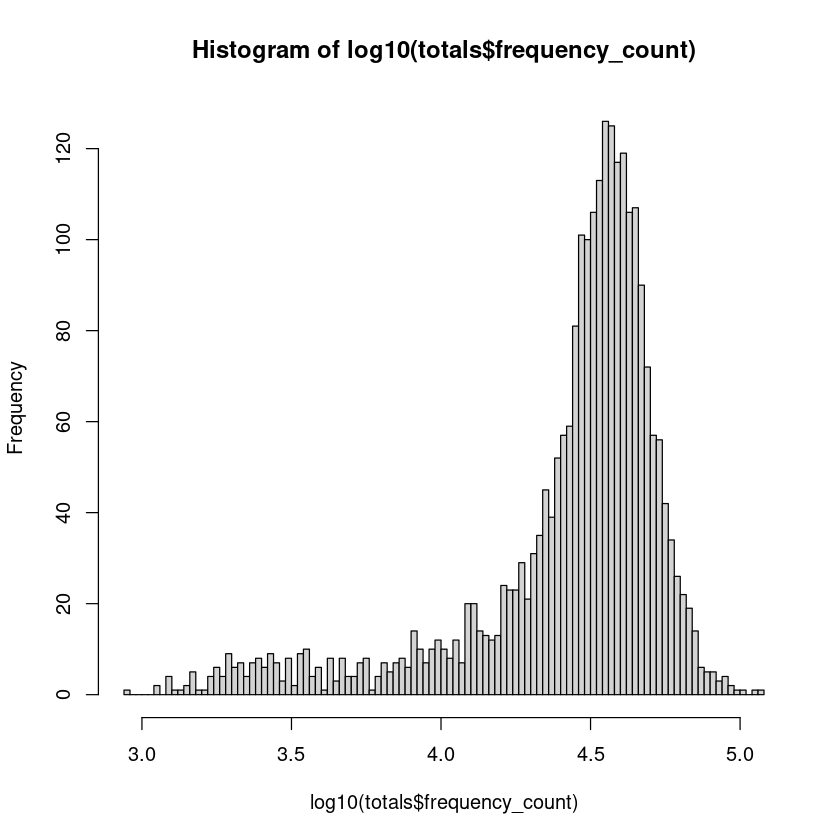

In [5]:
totals <- CountFragments(fragments = "../../data/spatial_ATAC/ME11_20um/GSM6043255_ME11_20um_fragments.tsv.gz")
hist(log10(totals$frequency_count), breaks = 100)
# cells.use <- totals[totals$frequency_count > 1000, "CB"]

In [ ]:
totals

In [6]:
# NOTE: We need use ArchR re tabix file before run this
fragments <- CreateFragmentObject("../../data/spatial_ATAC/ME11_20um/GSM6043255_ME11_20um_fragments.tsv.gz")
plan("multicore", workers = 16)
counts <- FeatureMatrix(fragments = fragments, features = peaks)
plan("sequential")

Computing hash

Extracting reads overlapping genomic regions



In [7]:
fwrite(as.data.table(peaks), "./seurat_var.csv", sep = ",")

In [8]:
counts <- as.data.table(counts)

In [9]:
counts %>% dim()
anno <- read_csv("../../data/spatial_ATAC/ME11_20um/ME11_20um_spatial/tissue_positions_list.csv", col_names = FALSE)
anno$barcode <- paste(anno$X1, "1", sep = "-")
head(anno)

[1] 33480  2500

Rows: 2500 Columns: 6
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1
dbl (5): X2, X3, X4, X5, X6

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,barcode
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AACGTGATAACGTGAT,1,0,0,491,1203,AACGTGATAACGTGAT-1
AACGTGATAAACATCG,1,1,0,504,1203,AACGTGATAAACATCG-1
AACGTGATATGCCTAA,1,2,0,517,1203,AACGTGATATGCCTAA-1
AACGTGATAGTGGTCA,1,3,0,529,1203,AACGTGATAGTGGTCA-1
AACGTGATACCACTGT,1,4,0,542,1203,AACGTGATACCACTGT-1
AACGTGATACATTGGC,1,5,0,555,1203,AACGTGATACATTGGC-1


In [10]:
length(intersect(anno$barcode, colnames(counts)))

[1] 2500

In [11]:
fwrite(counts, "./seurat_peaks.csv", sep = ",", col.names = T)